<a href="https://colab.research.google.com/github/kiryu-3/prosa/blob/main/Python/Python_Stats/Stats_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 平均値差の検定（対応あり）

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
from scipy.stats import f
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot

## 対応ありの平均値差の検定



今回からいよいよ**対応あり**の平均値差の検定を行っていきます。

[こちら](https://bit.ly/3EcMGlH)の問題を解いていきます。

### 仮説検定のステップ（再掲）
①帰無仮説と対立仮説を立てる  
②帰無仮説のもとで標本観察を行う  
③帰無仮説を棄却できるかどうかを確認する

#### ① 帰無仮説と対立仮説を立てる  

帰無仮説と対立仮説は以下のようになります。（**片側検定（下側）**になります）

帰無仮説$H_0$：「投薬前後の血圧は等しい」  
対立仮説$H_1$：「投薬によって血圧は下がった」

#### ② 帰無仮説のもとで標本観察を行う 

今回は、**各データの変化量**$d$を一つの標本として、その平均$\bar{d}$を考えていきます。

変化量の母集団の平均を$\mu_d$、分散を$\sigma_d^2$とします。 
また、変化量$d$の標本の平均を$\bar{d}$とします。

平均$\bar{d}$が従う確率分布は、変化量の母集団が正規分布に従うと仮定したとき、  
平均$\mu_d$、分散$\frac{\sigma_d^2}{n}$の正規分布となります。

$\sigma_d^2$は母集団の分散なので不定値です。  
そのため、代わりに**不偏分散** $s^{'2}_d$を使います。

不偏分散を用いたため、標準化したときの値は$t$**値**になります。

$$
t = \frac{\bar{d}-\mu_d}{\frac{s^{'}_d}{\sqrt{n}}}
$$

帰無仮説が正しいと仮定するため、$\mu_d=0$となります。

$$
t = \frac{\bar{d}}{\frac{s^{'}_d}{\sqrt{n}}}
$$

上の式に従って$t$値を導出します。

#### ③ 帰無仮説を棄却できるかどうかを確認する

有意水準を$5$%に設定します。

②で導出した$t$値と、有意水準に基づく$t$値を比較し、  
($p$**値を求めて**) 棄却が必要かどうか決めます。  

### Pythonによる仮説検定

では対応ありの平均値差の検定を行っていきましょう。

In [2]:
data = {
    "投与前の血圧":[180,130,165,155,140],
    "投与後の血圧" : [150,135,145,150,140],
}

df = pd.DataFrame(data)
df

,投与前の血圧,投与後の血圧
0,180,150
1,130,135
2,165,145
3,155,150
4,140,140


In [3]:
df["差（投与前-投与後）"] = df["投与前の血圧"]-df["投与後の血圧"]
df

,投与前の血圧,投与後の血圧,差（投与前-投与後）
0,180,150,30
1,130,135,-5
2,165,145,20
3,155,150,5
4,140,140,0


In [4]:
print("帰無仮説H_0：投薬前後の血圧は等しい")  
print("対立仮説H_1：投薬によって血圧は下がった")

帰無仮説H_0：投薬前後の血圧は等しい
対立仮説H_1：投薬によって血圧は下がった


In [5]:
tt , pp = tuple(stats.ttest_rel(df["投与前の血圧"],df["投与後の血圧"],alternative="greater"))

tt = float(Decimal(str(tt)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{tt}")
pp = float(Decimal(str(pp*100)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"p値：{pp}%")

検定統計量のt値:1.534
p値：9.991%


自由度$4$の$t$分布における有意水準$5$%に対応する値は$2.132$です。

In [6]:
float(Decimal(str(t.ppf(0.95, len(df)-1))).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))

2.132

* $t$値が$2.132$より小さくなった
* $p$値が$5$%より大きくなった

この二点から、帰無仮説$H_0$を棄却することができません。  
よって、対立仮説$H_1$を採択しません。


In [9]:
print("したがって、投薬によって血圧は下がったとは言えない")

したがって、投薬によって血圧は下がったとは言えない


### Pythonによる描画

平均値差の検定をするときは、$t$検定を行うだけではなくて、  
データの分布も一緒に確認するようにしましょう。

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


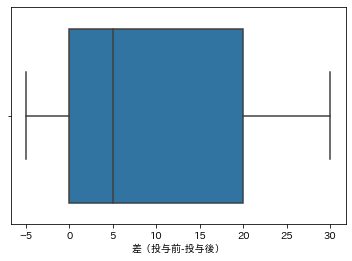

In [8]:
sns.boxplot(df["差（投与前-投与後）"])

箱ひげ図的には投与前の方が血圧が高いといえそうですが、  
仮説検定で確かめることはできませんでした。